## Microsoft wants to make a Big Film


## Overview
This project focus on which type to movie to make based on audience point of view and what type of movie has gained profit .Microsoft team could use these analyses for their new beginging in the film industry.It would help them in making high grossing film

## Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies.I have used data based on genres and the movie length to find the high gross and high rating .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
title=pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
rating=pd.read_csv('zippeddata/imdb.title.ratings.csv.gz')
gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
budget=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
crew=pd.read_csv('zippedData/imdb.title.crew.csv.gz')
principals=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
movie_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='iso-8859-1')
reviews=pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='iso-8859-1')
titles=pd.read_csv('zippedData/tmdb.movies.csv.gz')
# df = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')



In [2]:
title.info()
title.head()
# titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
budget.duplicated().any()

False

In [ ]:
# budget['production_budget']=budget['production_budget'].str.split('$').map(lambda x:x[1])

In [ ]:
# budget['production_budget']=budget['production_budget'].replace(',','')

In [13]:
budget['production_budget']=budget['production_budget'].str.replace(',','').str.split('$').map(lambda x:x[1])

In [18]:
budget['production_budget'].str.contains('.').sum()

5782

In [19]:
budget['production_budget'].astype(float)

0       425000000.0
1       410600000.0
2       350000000.0
3       330600000.0
4       317000000.0
           ...     
5777         7000.0
5778         6000.0
5779         5000.0
5780         1400.0
5781         1100.0
Name: production_budget, Length: 5782, dtype: float64

In [3]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
gross['foreign_gross'].str.contains(',').sum()


5

In [6]:
gross['foreign_gross']=gross['foreign_gross'].str.replace(',','')


In [7]:
gross['foreign_gross'].str.contains(',').any()

False

In [8]:
gross['foreign_gross'].str.contains('.').sum()

2037

In [9]:
gross['foreign_gross']=gross['foreign_gross'].astype(float)

In [10]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### Data Cleaning

In [11]:
title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
title.drop('original_title',axis=1,inplace=True)

In [13]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [14]:
title['runtime_minutes']=title['runtime_minutes'].fillna(0)

In [15]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [16]:
title['genres'].isna().sum()/len(title)

0.037004598204510616

In [17]:
title=title.dropna()

In [18]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 5 columns):
tconst             140736 non-null object
primary_title      140736 non-null object
start_year         140736 non-null int64
runtime_minutes    140736 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [19]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title')
title.drop_duplicates(subset=['primary_title','start_year','runtime_minutes'],inplace=True)

In [20]:
title[title.duplicated(subset=['primary_title','start_year','runtime_minutes'],keep=False)].sort_values(by='primary_title').any()

tconst             False
primary_title      False
start_year         False
runtime_minutes    False
genres             False
dtype: bool

In [21]:
title[title.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title')
title.drop_duplicates(subset=['primary_title','start_year'],inplace=True)

In [22]:
# title[title['primary_title'].str.contains("\(")]

In [23]:
title[title.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title').any()

tconst             False
primary_title      False
start_year         False
runtime_minutes    False
genres             False
dtype: bool

In [24]:
# title.drop('original_title',axis=1,inplace=True)

In [25]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138926 entries, 0 to 146143
Data columns (total 5 columns):
tconst             138926 non-null object
primary_title      138926 non-null object
start_year         138926 non-null int64
runtime_minutes    138926 non-null float64
genres             138926 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [26]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [27]:
gross.duplicated().any()

False

In [28]:
gross[gross.duplicated(subset='title',keep=False)]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200.0,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [29]:
# gross.isna().sum()

In [30]:
# gross['foreign_gross'].isna().sum()/len(gross['foreign_gross'])

In [31]:
# gross.describe()
# print(gross['foreign_gross'].apply(['median','mean','std']))


In [32]:
# gross['foreign_gross'].plot(kind='hist',figsize=(10,8))
# gross.hist(column='foreign_gross')

In [33]:
# gross_mean=gross['foreign_gross'].fillna(value=gross['foreign_gross'].mean())
# print(gross_mean.apply(['median','mean','std']))
# gross_mean.hist()


In [34]:
# gross_median=gross['foreign_gross'].fillna(gross['foreign_gross'].median())
# print(gross_median.apply(['median','mean','std']))
# gross_median.hist()

In [35]:
# title_tconst=pd.merge(title,rating, on='tconst',how='left')
title_tconst=title.merge(rating,on='tconst',how='inner')
# title_tconst.head()

# animal_shelter_df  = pd.merge(intakes, 
#                               outcomes, 
#                               on=['animal_id', 'event_num'], 
#                               how='left')

In [36]:
title_tconst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 7 columns):
tconst             72300 non-null object
primary_title      72300 non-null object
start_year         72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ MB


In [37]:
# title_tconst[title_tconst['primary_title'].str.contains('\(')]
title_tconst[title_tconst.duplicated(subset=['primary_title','start_year'],keep=False)].sort_values(by='primary_title')

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [38]:
title_tconst.rename(columns={'primary_title':'title','start_year':'year'},inplace=True)
title_tconst.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 7 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ MB


In [39]:
# movie_data=title_tconst.merge([gross,budget],on='title',how='left')
# title_tconst.merge(gross,on='title').merge(budget,on='title')
# df1.merge(df2,on='name').merge(df3,on='name')
#  result = pd.merge(left, right, how='left', on=['key1', 'key2'])
# dfs=[title_tconst,budget,gross]
# result_1 = pd.concat(dfs, join='outer', axis=1)
# result = pd.merge(title_tconst, gross, budget, how='left', on='title')
# df = pd.merge(title_tconst, budget, on=['title','year'],how='outer')
df= pd.merge(title_tconst, gross, on=['title','year'],how='left')
# title_tconst=title.merge(rating,on='tconst',how='left')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 10 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres             72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
studio             1820 non-null object
domestic_gross     1812 non-null float64
foreign_gross      1252 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 6.1+ MB


In [41]:
df.iloc[-1]

tconst               tt9916160
title               Drømmeland
year                      2019
runtime_minutes             72
genres             Documentary
averagerating              6.5
numvotes                    11
studio                     NaN
domestic_gross             NaN
foreign_gross              NaN
Name: 72299, dtype: object

In [42]:
genres_list=df['genres'].str.split(',')

In [43]:
list1=list(genres_list[:5])
list1
genres_list[5]

['Horror', 'Thriller']

### Analysis

In [44]:
# def genres_category(list_val):
#     categories = []
#     for category in list_val:
#         for n in category:
#             categories.append(n)
#     return categories
            

In [45]:
categories = []
for category in genres_list:
    for n in category:
        categories.append(n)
        

In [46]:
genres_list_data=list(set(categories))

In [47]:
genres_list_data=sorted(genres_list_data)

In [48]:
len(genres_list_data)

26

In [49]:
df_genres=pd.DataFrame(genres_list)

In [50]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 1 columns):
genres    72300 non-null object
dtypes: object(1)
memory usage: 3.6+ MB


In [51]:
df_genres.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"


In [52]:
for value in genres_list_data:
    df_genres[value]=0

In [53]:
df_genres.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# for value in genres_list_data[:5]:
#     print(value)

In [55]:
for value in df_genres.index:
    for genre in genres_list_data:
        if genre in df_genres['genres'][value]:
            df_genres[genre][value]=1

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
df_genres.head()



,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_genres.columns[0]
type(df_genres)

pandas.core.frame.DataFrame

In [58]:
# movie_df=pd.merge(df,df_genres,on='genres',how='inner')
# movie_df=pd.merge(df, df_genres, left_index=True, right_index=True)
movie_df=pd.merge(df,df_genres,left_index=True,right_index=True)
movie_df=movie_df.drop('genres_y',axis=1)

In [59]:
movie_df.head()

,tconst,title,year,runtime_minutes,genres_x,averagerating,numvotes,studio,domestic_gross,foreign_gross,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [60]:
movie_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 36 columns):
tconst             72300 non-null object
title              72300 non-null object
year               72300 non-null int64
runtime_minutes    72300 non-null float64
genres_x           72300 non-null object
averagerating      72300 non-null float64
numvotes           72300 non-null int64
studio             1820 non-null object
domestic_gross     1812 non-null float64
foreign_gross      1252 non-null float64
Action             72300 non-null int64
Adult              72300 non-null int64
Adventure          72300 non-null int64
Animation          72300 non-null int64
Biography          72300 non-null int64
Comedy             72300 non-null int64
Crime              72300 non-null int64
Documentary        72300 non-null int64
Drama              72300 non-null int64
Family             72300 non-null int64
Fantasy            72300 non-null int64
Game-Show          72300 non-null int64
Hi

In [61]:
# empty_list=[]
# for n in genres_list_data:
#     for val in df1[n]:
#         if df1['averagerating']:
#                 print(df1['averagerating'])
# for n in genres_list_data:
#     for val in movie_df[n]:
#         if val==1:
#             print('{} :movie_df[n]'.format(n))

# max_rating['Adventure'].hist()
# plt.show()
max_rating=movie_df[movie_df['averagerating'] > 7.0]             

# df2=max_rating.head(30)
# df2['Adult']


In [62]:
# max_rating.plot(kind='hist',x='Action',y='averagerating',figsize=(8,4))
# max_rating['Action'].hist()

In [63]:
# top 6 genres by the total number of movies
# top6_genre = (tidy_movie_ratings.iloc[:, 4:-1] # get the genre columns only
#               .sum() # sum them up
#               .sort_values(ascending=False) # sort descending
#               .head(6) # get the first 6
#               .index.values # get the genre names
#               )

# top6_genre
# genre_groups = (tidy_movie_ratings.iloc[:, 4:]
#                 .groupby("production_year")
#                 .sum()
#                ).loc["2000":"2019", top6_genre] # since 2000

In [64]:
genres_data=(max_rating.iloc[:,10:].sum().sort_values(ascending=False).head(5).index.values)


In [65]:
genres_data

array(['Documentary', 'Drama', 'Comedy', 'Biography', 'Action'],
      dtype=object)

In [66]:
genre_groups=(max_rating.iloc[:,2:].groupby(by='year').sum()).loc['2000':'2018',genres_data]


In [67]:
genre_groups

,Documentary,Drama,Comedy,Biography,Action
year,,,,,
2010,1039,756,346,187,129
2011,1172,848,376,223,136
2012,1188,908,396,232,160
2013,1223,1033,415,287,148
2014,1351,1088,411,353,182
2015,1373,992,368,300,165
2016,1379,1044,439,224,181
2017,1291,1102,438,170,200
2018,994,1081,482,120,167


In [68]:
# genre_groups.rolling(2).mean().plot(figsize=(15,5),
#                                     title="Total Rated Films")

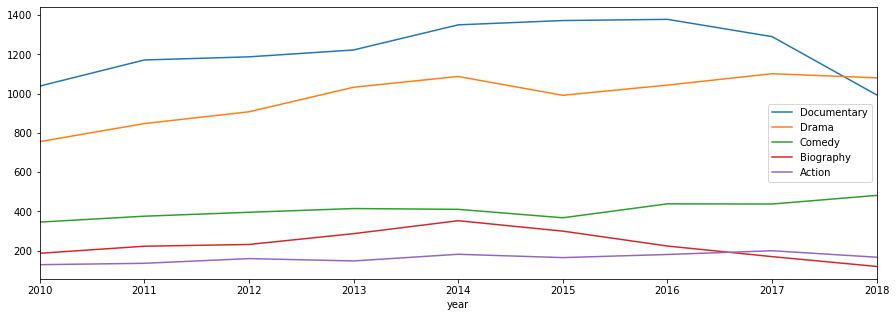

In [69]:
genre_groups.plot(figsize=(15,5))

In [70]:
max_rating['Action'].sum()

1537

In [71]:
max_rating.columns[10:]

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [72]:
# val_1=movie_df[(movie_df['Action']==1)&(movie_df['Adult']==1)]
# val_1=movie_df.loc[movie_df[['Comedy', 'Crime', 'Documentary']] == 1]
               
               
               
#                &(movie_df['Adventure']==1)]
               
               
               
               
#(movie_df['Adventure']==1)&(movie_df['Animation']==1)&(movie_df['Biography']==1)&(movie_df['Comedy']==1)&(movie_df['Crime']==1)&(movie_df['Documentary']==1)&(movie_df['Drama']==1)&(movie_df['Family']==1)&(movie_df['Fantasy']==1)&(movie_df['Game-Show']==1)&(movie_df['History']==1)&(movie_df['Music']==1)&(movie_df['Musical']==1)&(movie_df['Mystery']==1)&(movie_df['News']==1)&(movie_df['Reality-TV']==1)&(movie_df['Romance']==1)&(movie_df['Sci-Fi']==1)&(movie_df['Short']==1)&(movie_df['Sport']==1)&(movie_df['Thriller']==1)&(movie_df['War']==1)&(movie_df['Western']==1)]




# (movie_df['Action']==1)&(movie_df['Adult']==1)&(movie_df['Adventure']==1)&(movie_df['Animation']==1)&
# (movie_df['Biography']==1)&(movie_df['Comedy']==1)&(movie_df['Crime']==1)&(movie_df['Documentary']==1)&
# (movie_df['Drama']==1)&(movie_df['Family']==1)&(movie_df['Fantasy']==1)&(movie_df['Game-Show']==1)&movie_df['History']==1&
# (movie_df['Music']==1)&(movie_df['Musical']==1)&(movie_df['Mystery']==1)&(movie_df['News']==1)&
# (movie_df['Reality-TV']==1)&(movie_df['Romance']==1)&(movie_df['Sci-Fi']==1)&(movie_df['Short']==1)&(movie_df['Sport']==1)&
# (movie_df['Thriller']==1)&(movie_df['War']==1)&(movie_df['Western']==1)







val_1

NameError: name 'val_1' is not defined

In [ ]:
max_rating.columns

In [ ]:
# max_rating.plot(kind='hist',x='averagerating',y='Documentary')
# max_rating[['Action', 'Adult', 'Adventure',
#        'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
#        'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
#        'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
#        'Short', 'Sport', 'Thriller', 'War', 'Western']].hist(figsize=(20,10))
# max_rating.plot(kind='hist',x='averagerating',y=[max_rating['Action'],max_rating['Adult'],max_rating['Adventure'],max_rating['Animation'],max_rating['Biography'],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating[''],max_rating['']])
val_1.plot(kind='hist',x='averagerating',y=['Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western'],figsize=(20,10))
plt.show()
# df2.groupby("Action").plot(kind='hist',x='averagerating',y=['Action','Adult'],figsize=(10,10))
# df.groupby("country")['unemployment'].mean().plot(kind='bar')


In [ ]:
# value_1 = max_rating[['Action','Adult', 'Adventure', 'Animation','Biography']] == 1
# value_1
# # value_0 = df2[df2['Adult'] == 1]
# def show_distplot(dataframe, column_name):
#     plt.plot()
# value1['Adventure'].hist(figsize=(10,10))
# #     plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
# #     plt.xlabel(column_name)
# #     plt.ylabel('Probability Density')
# plt.show()

In [ ]:
# show_distplot(value_1, ['Action','Adult','Adventure', 'Animation','Biography'])


In [ ]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean height for male heroes: {}'.format(male_heroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_heroes_df.Height.median()))

In [ ]:
empty_list1=[]
for n in genres_list_data:
    for val in df2[n]:
        if df2[n]==1:
            empty_list1.append(val)
            
# for i in range(0,5):
#     empty_list1.append(i)
#     print(empty_list1)
empty_list1



In [ ]:
for n in genres_list_data:
    for val in max_rating[n]:
        if val==1:
            print(max_rating[n])

In [ ]:
# def genres_analysis(dataframe,genres_list):
#     genres_val=[]
#     for n in genres_list:
#         if dataframe[n]:
#             x=genres_val.append(dataframe[n])
#             y=dataframe['averagerating']
#             plt.bar(x,y)
#             plt.show()


In [ ]:
# # list_empty=[]
# # for n in 

# # df1.plot(kind='hist',x='averagerating',y=['Action','Adult','Biography'],figsize=(10,5))
# # plt.xlabel('Genre')
# # plt.ylabel('rating')
# df1.plot.line(x='averagerating',y=['Action','Adult','Biography'])
# plt.show()

# plot(df1(:,'averagerating'), df1(:,'Action':'Adult')')
       
              
              

In [ ]:
df1